## 4.10: Coding Etiquette & Excel Reporting

# Table of Contents
Part 1: Setup and Libraries

Part 2: Data Import

Part 3: Discussing Data Security Implications

Part 4: Regional Sales

Part 5: High vs. Low Activity Customers Dataframe

Part 6: Creating New Exclusion Flag Based on Age, Income, and Number of Dependants 

Part 7: Busiest Day Of The Week

Part 8: Busiest Hour of the Day¶

Part 9: Sales Of Various Low, Mid and High Ranged Products

Part 10: Sales Between Different Departments

Part 11: Customer Profiles Between Parent Status and Income Brackets

Part 12: Income Bracket Descriptive Statistics

Part 13: Export Data

# Part 1: Setup and Libraries

In [303]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Part 2: Data Import
## 4.10 Exercise Question 1: Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [4]:
#Importing path, and csv files of products

path= r'/Users/erictam/Downloads/CareerFoundry Program/Data Immersion Achievement 4/Instacart Basket Analysis'

# To import 4.9 customer_ords_prods part A.pkl

customer_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9 customer_ords_prods part A.pkl'))
customer_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,Gender,State,Age,date_joined,number_dependants,fam_status,income
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,11.114836,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,11.114836,12427,3,0,Original Beef Jerky,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,11.114836,26088,4,0,Aged White Cheddar Popcorn,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,11.114836,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Part 3: Discussing Data Security Implications

## 4.10 Exercise question 2: Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.


### Security implications that may arise is the PII data that can be link to a specific person. As this data highlights a first/last name, age, state of residence, family status and income, these can be sensitive information to possibly be used and draw a connection to somebody. Actions steps to be taken will include: 

### 1: inform the senior collegue for data secutry concerns, 
### 2: comply with EU data privacy regulations that govern the storage, usage and sharing of data

# Part 4: Regional Sales 

# Exercise 4.10 Question 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

## - Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

## - Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:
#Through the wikipedia article, in order to create the correct regions, the states will be categorized based on a Northeast, Midwest, South, and West region. These 4 regions will include the states consistent with the article

# Step 1: regional mapping
# 'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'],
# 'Midwest': ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'],
# 'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
# 'West': ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

#step 2: creating the if statements within the new empty list of region_map
region_map = []

for value in customer_ords_prods['State']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region_map.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region_map.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region_map.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region_map.append('West')
    else:
        region_map.append('Not enough data')

region_map

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'Wes

In [8]:
# step 2: setting region_map to new column region

customer_ords_prods['Region']=region_map

In [9]:
#Performing value counts to make sure script was correctly performed 
customer_ords_prods['Region'].value_counts(dropna = False)

Region
South        10799821
West          8299211
Midwest       7602550
Northeast     5727503
Name: count, dtype: int64

In [10]:
#Comparing it to total counts of the dataset
customer_ords_prods.shape
#32429085 rows are equal to the the total count when adding up the values of all 4 regions. There are no Nan values so we can conclude it was done correctly 

(32429085, 32)

In [277]:
#Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
#Using crosstab to identify spending patterns

crosstab = pd.crosstab(customer_ords_prods['Region'], customer_ords_prods['spender_type'], dropna = False)
crosstab.to_clipboard()


Region	High Spender|Low Spender
Midwest	  29344	     7573206
Northeast 18732	     5708771
South	  40988    	10758833
West	  31647	     8267564

From this crosstab, we can see that the vast amount of customers fall within the Low spending category, which means they tend to spend <$10 per purchase. Additionally, the South regions seems to have the most sales from this crosstab data

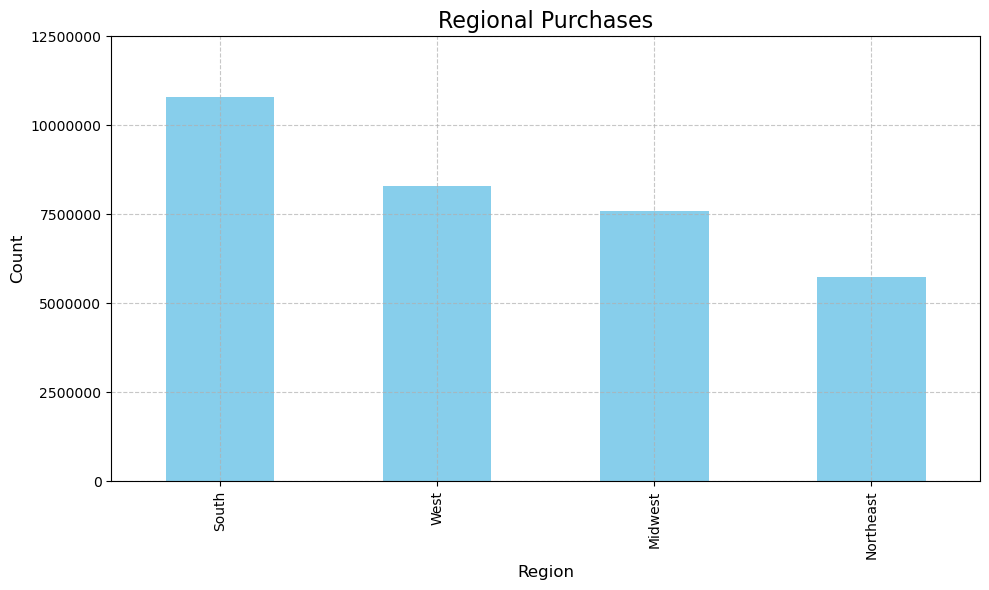

In [137]:
# Plotting the crosstab data
bar_regional_counts = customer_ords_prods['Region'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))

# Customizations
plt.title('Regional Purchases', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12) 
plt.yticks(np.arange(0,15000000,2500000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,2500000)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

bar_regional_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '1 4.10 bar_regional_counts.png'))

# Part 5: High vs. Low Activity Customers Dataframe

## Exercise 4.10 Question 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [15]:
#Creating an exclusion flag
# Low-activity customers = max_order < 5
# High-activity customer = max_order >=5

activity_customer=[]

for value in customer_ords_prods['max_order']:
    if value <5:
        activity_customer.append('Low-activity Customer')
    elif value >=5:
        activity_customer.append('High-activity Customer')
    else: activity_customer.append('Not enough information')
customer_ords_prods['activity_customer_level']=activity_customer

In [16]:
#Checking to see if it was done correctly
customer_ords_prods['activity_customer_level'].value_counts(dropna = False)

activity_customer_level
High-activity Customer    30987787
Low-activity Customer      1441298
Name: count, dtype: int64

In [17]:
# Subsetting a new df based on a high-activity customer

high_activity_cust_ords_prods = customer_ords_prods[customer_ords_prods['activity_customer_level']=='High-activity Customer']
high_activity_cust_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,Gender,State,Age,date_joined,number_dependants,fam_status,income,Region,activity_customer_level
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
1,2539329,1,1,2,8,11.114836,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
2,2539329,1,1,2,8,11.114836,12427,3,0,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
3,2539329,1,1,2,8,11.114836,26088,4,0,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
4,2539329,1,1,2,8,11.114836,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer


In [18]:
#Checking values if correct
high_activity_cust_ords_prods['activity_customer_level'].value_counts(dropna = False)
#Since High-activity customers make up 100% of the new dataframe, the exclusion flag was correctly subsetted

activity_customer_level
High-activity Customer    30987787
Name: count, dtype: int64

In [19]:
#Exporting data
high_activity_cust_ords_prods.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10 high_activity_cust_ords_prods.pkl'))

# Part 6: Creating New Exclusion Flag Based on Age, Income, and Number of Dependants 

## 4.10 Question 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [21]:
#Customer profiling based on age based off of quartiles found through the describe function
customer_ords_prods[['Age','income','number_dependants']].describe()

#young_adult<33
#adult >=33 & <49
#older_adult >=49 &<65
#senior >=65

,Age,income,number_dependants
count,3.242908e+07,3.242908e+07,3.242908e+07
mean,4.946521e+01,9.941438e+04,1.501867e+00
std,1.848553e+01,4.300419e+04,1.118872e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.699500e+04,1.000000e+00
50%,4.900000e+01,9.660800e+04,2.000000e+00
75%,6.500000e+01,1.278760e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


In [22]:
age_groups=[]

for value in customer_ords_prods['Age']:
    if value <33:
        age_groups.append('Young adult')
    elif value >=33 and value <49:
        age_groups.append('Adult')
    elif  value >=49 and value < 65:
        age_groups.append('Older adult')
    elif value >=65:
        age_groups.append('Senior')
    else: age_groups.append('Not enough information')
customer_ords_prods['age_group']=age_groups

In [23]:
#Checking if is done correctly. And all values add up to 32,429,085
customer_ords_prods['age_group'].value_counts(dropna= False)

age_group
Senior         8581304
Adult          8122169
Older adult    8094073
Young adult    7631539
Name: count, dtype: int64

In [24]:
#Customer profiling based on income and the quartiles of income brackets
customer_ords_prods['income'].describe()

#Low Income Customer: <96608
#Middle Income Customer >=96608 & < 127876
#High Income Customer >=127876

count    3.242908e+07
mean     9.941438e+04
std      4.300419e+04
min      2.590300e+04
25%      6.699500e+04
50%      9.660800e+04
75%      1.278760e+05
max      5.939010e+05
Name: income, dtype: float64

In [25]:
#Customer profile for income flag
income_bracket=[]

for value in customer_ords_prods['income']:
    if value <96608:
        income_bracket.append('Low Income Customer')
    elif value >=96608 and value <127876:
        income_bracket.append('Middle Income Customer')
    elif  value >=127876:
        income_bracket.append('High Income Customer')
    else: income_bracket.append('Not enough information')
customer_ords_prods['Income_bracket']=income_bracket

In [26]:
#Checking is done correctly. And all values add up to 32,429,085
customer_ords_prods['Income_bracket'].value_counts(dropna= False)

Income_bracket
Low Income Customer       16214141
High Income Customer       8107729
Middle Income Customer     8107215
Name: count, dtype: int64

In [27]:
#Customer profiling based on number of dependents
customer_ords_prods['number_dependants'].describe()

#Single= <1
#Parent= >=1

count    3.242908e+07
mean     1.501867e+00
std      1.118872e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

In [28]:
dependents=[]

for value in customer_ords_prods['number_dependants']:
    if value <1:
       dependents.append('Single')
    elif value >=1:
        dependents.append('Parent')
    
    else: dependents.append('Not enough information')
customer_ords_prods['parent_status']=dependents

In [29]:
#Checking is done correctly. And all values add up to 32,429,085
customer_ords_prods['parent_status'].value_counts(dropna= False)

parent_status
Parent    24325116
Single     8103969
Name: count, dtype: int64

# Part 7: Busiest Day of The Week

## Project Brief Key Questions 1:
## "The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders."

In [31]:
#Adding new column for day of week for better readability

day_of_week = []
for value in customer_ords_prods['orders_day_of_week']:
    if value == 0:
        day_of_week.append('Saturday')
    elif value == 1:
        day_of_week.append('Sunday')
    elif value == 2:
        day_of_week.append('Monday')
    elif value == 3:
        day_of_week.append('Tuesday')
    elif value == 4:
        day_of_week.append('Wednesday')
    elif value == 5:
        day_of_week.append('Thursday')
    elif value == 6:
        day_of_week.append('Friday')

customer_ords_prods['day_of_week'] = day_of_week
customer_ords_prods['day_of_week'].value_counts(dropna= False)


day_of_week
Saturday     6208779
Sunday       5664898
Friday       4499643
Monday       4217041
Thursday     4208734
Tuesday      3843427
Wednesday    3786563
Name: count, dtype: int64

In [32]:
crosstab_age_vs_dow = pd.crosstab(customer_ords_prods['day_of_week'], customer_ords_prods['age_group'], dropna = False)
crosstab_age_vs_dow

age_group,Adult,Older adult,Senior,Young adult
day_of_week,,,,
Friday,1123597,1124767,1200652,1050627
Monday,1055733,1058885,1115162,987261
Saturday,1559439,1538784,1644498,1466058
Sunday,1413379,1418445,1484302,1348772
Thursday,1054455,1051333,1114114,988832
Tuesday,963075,958466,1023680,898206
Wednesday,952491,943393,998896,891783


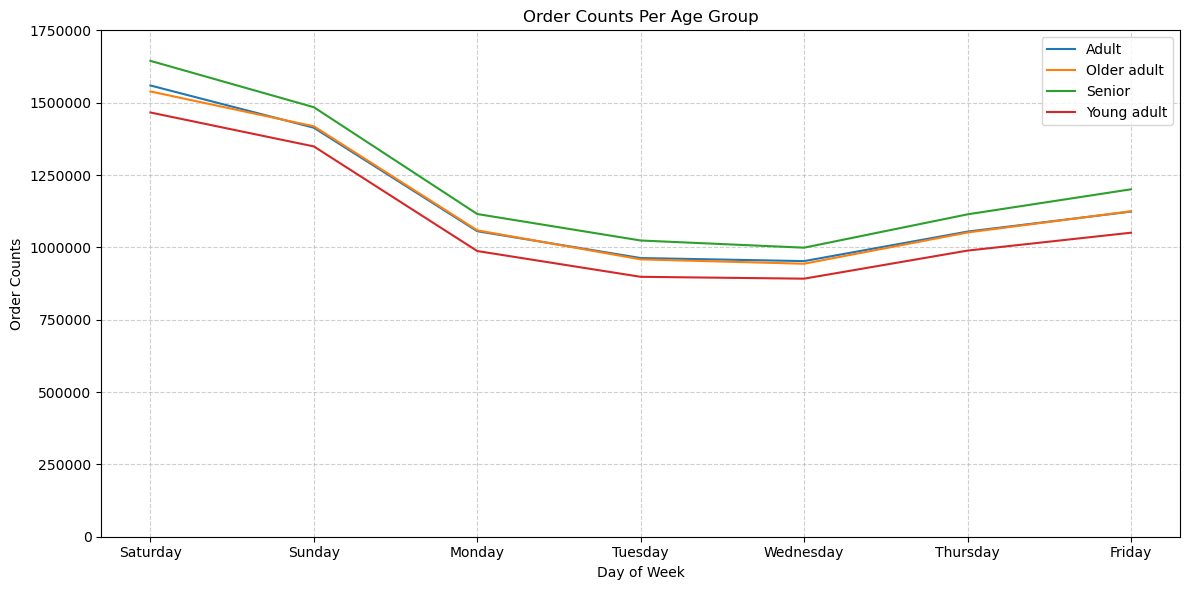

In [139]:

#Reordering the columns into chronological order
desired_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Reorder the DataFrame's index to the desired order
crosstab_age_vs_dow = crosstab_age_vs_dow.reindex(desired_order)

# Create the line chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

for age_group in crosstab_age_vs_dow.columns:
    plt.plot(crosstab_age_vs_dow.index, crosstab_age_vs_dow[age_group], label=age_group)

# Add title and labels
plt.title('Order Counts Per Age Group')
plt.xlabel('Day of Week')
plt.ylabel('Order Counts')

# Add legend
plt.legend()

# Display the plot
plt.yticks(np.arange(0,2000000,250000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,2000000,250000)])
plt.xticks(range(0, 7))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '2 4.10 line_age_group_vs_dow.png'))
plt.show() 

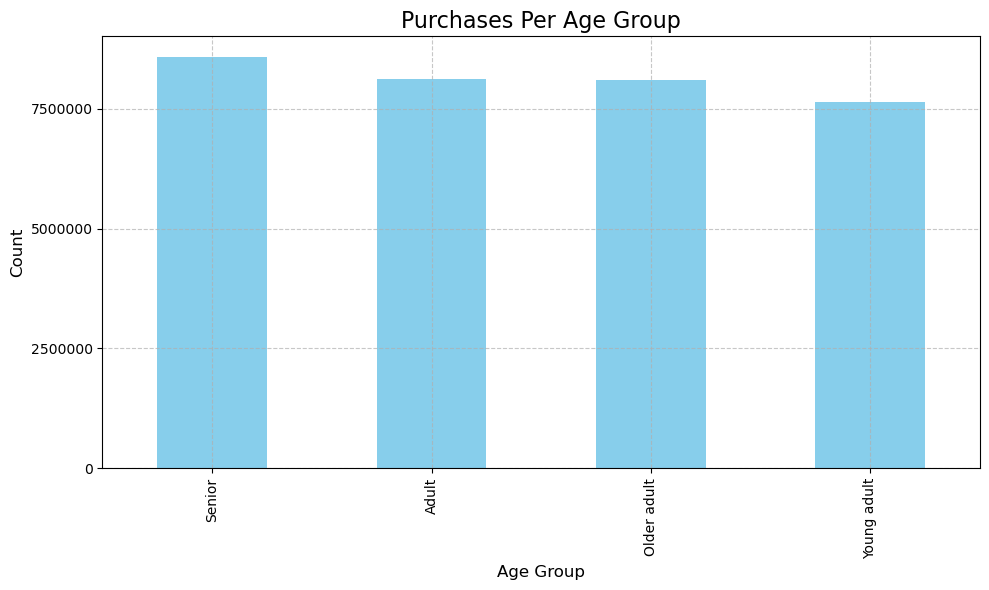

In [141]:
bar_age_group_counts= customer_ords_prods['age_group'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))

# Customizations
plt.title('Purchases Per Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12) 
plt.yticks(np.arange(0,10000000,2500000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2500000)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
bar_age_group_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '3 4.10 bar_age_group_counts.png'))

# Part 8: Busiest Hour of the Day

## Project Brief Key Question 2:
### "They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times."

In [281]:

crosstab_age_vs_time = pd.crosstab(customer_ords_prods['order_time_hour_of_day'], customer_ords_prods['age_group'], dropna = False)
crosstab_age_vs_time

age_group,Adult,Older adult,Senior,Young adult
order_time_hour_of_day,,,,
0,55550,53963,56648,52754
1,29270,28456,30153,27890
2,17687,16171,18320,17238
3,12788,12066,13975,12475
4,12598,13528,14334,12813
5,21128,21955,24066,20891
6,71821,70291,77650,70965
7,216865,225223,240460,209249
8,429465,431072,457283,401877


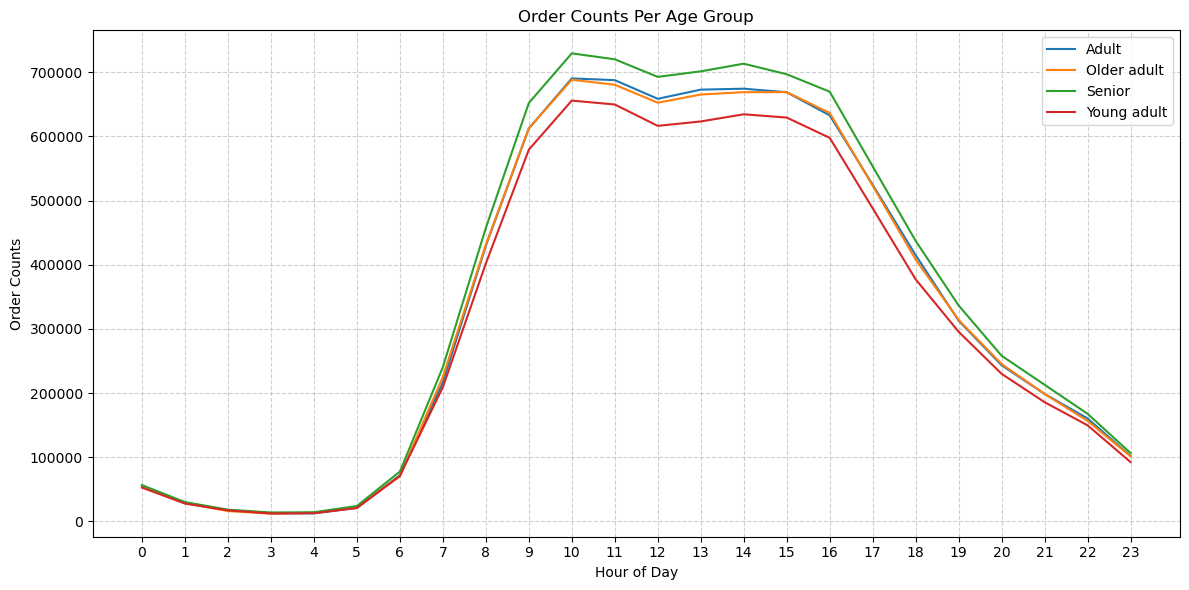

In [143]:
# Create the line chart
plt.figure(figsize=(12, 6)) 

for age_group in crosstab_age_vs_time.columns:
    plt.plot(crosstab_age_vs_time.index, crosstab_age_vs_time[age_group], label=age_group)

# Add title and labels
plt.title('Order Counts Per Age Group')
plt.xlabel('Hour of Day')
plt.ylabel('Order Counts')

# Add legend
plt.legend()

# Display the plot
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4 4.10 line_age_group_vs_time.png'))
plt.show() 

In this data, purchase data per hour was grouped per age group. Throughout all the purchase data, it seems like every age group follows the same trend of shopping per day. There seems to hit a peak at around 10 am for all age groups. The senior group makes up the most amount of purchase volume.

It seems the all age groups also follow similar purchase trends as it peaks on a Saturday, then dips into the week. After tuesday, it continues to trend back up again.

# Part 9: Sales Of Various Low, Mid and High Ranged Products
## Key Questions 3:
### Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

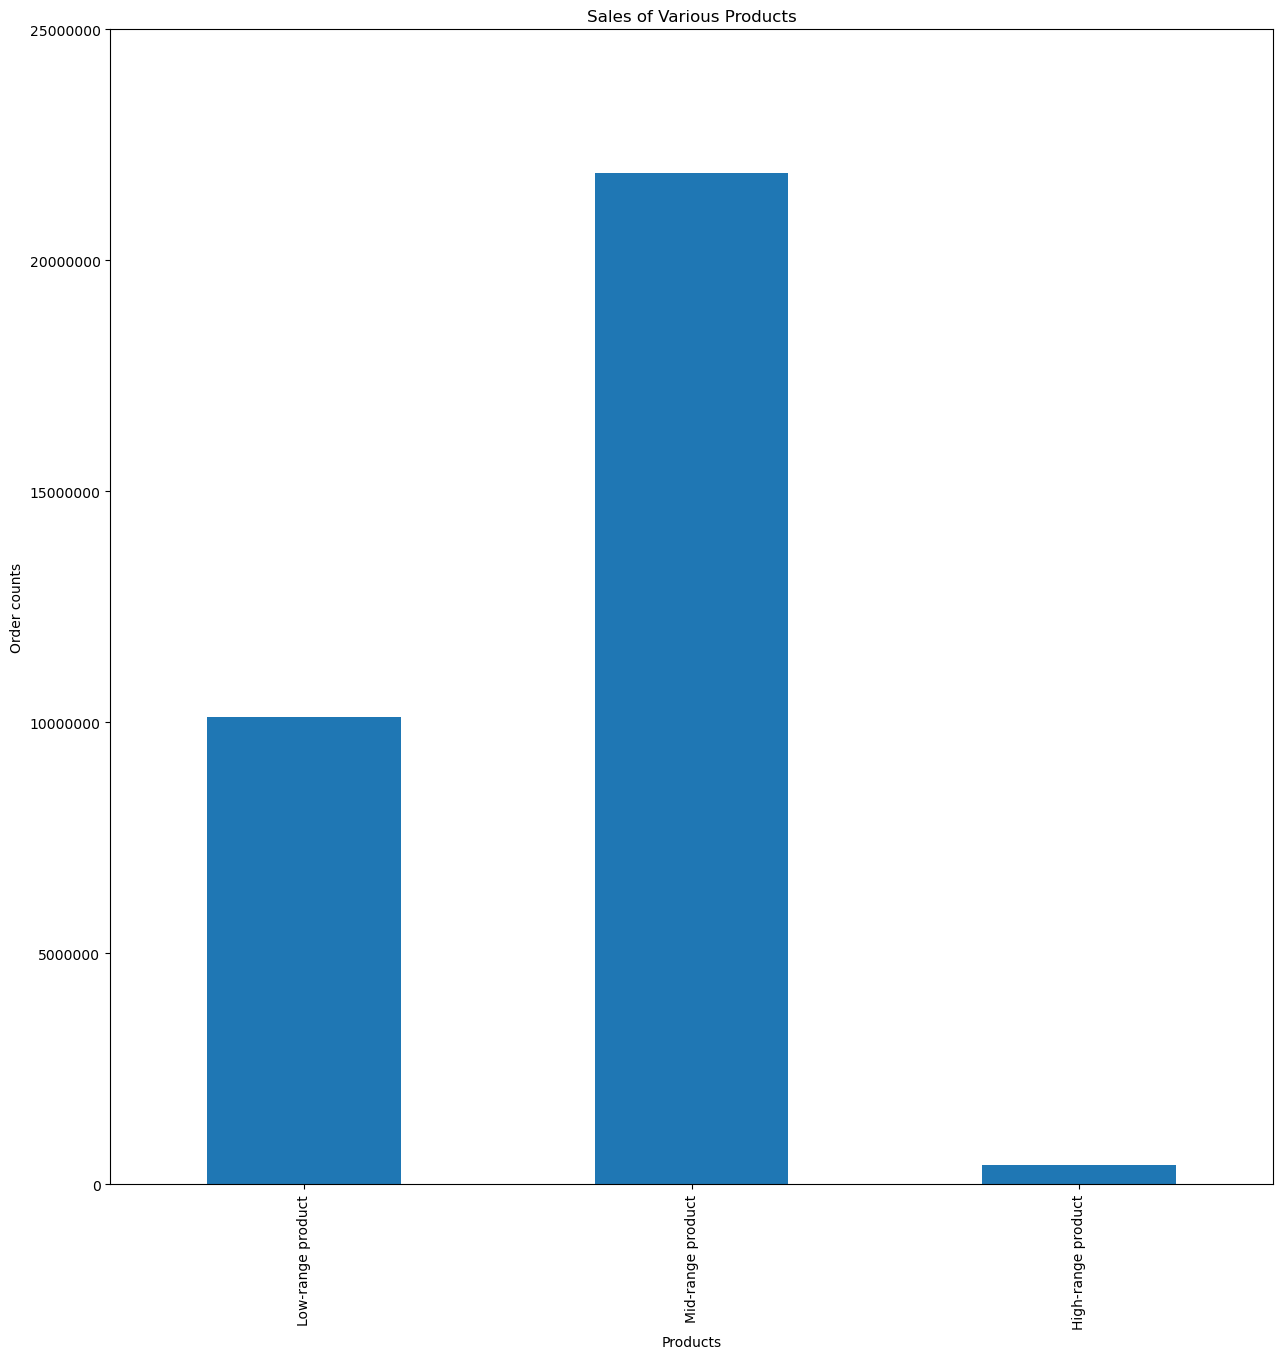

In [164]:
#From exercise 4.7, new variables of range groups of price tags were generated 

#High_range product: >$15
#Mid-Range Product: >$5 & <=$15
#Low-Range Product: <$5

# Reorder the categories
ordered_categories = ['Low-range product', 'Mid-range product', 'High-range product']

# Use Categorical data type to enforce the order
customer_ords_prods['price_range_loc'] = pd.Categorical(customer_ords_prods['price_range_loc'], categories=ordered_categories, ordered=True)

plt.figure(figsize=(15, 15))

# Plot the bar chart with the ordered categories
customer_ords_prods['price_range_loc'].value_counts().sort_index().plot.bar()

# Add title and labels
plt.title('Sales of Various Products')
plt.xlabel('Products')
plt.ylabel('Order counts')

# Add legend
plt.yticks(np.arange(0,30000000,5000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,30000000,5000000)])

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '5 4.10 bar_sales_product_ranges.png'))
plt.show()

In this graph, we can see the mid-ranged products have the highest sales. Or in other words, products that are priced between $5 and $15

# Part 10: Sales Between Different Departments
## Key Questions 4:
### Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [148]:
#Adding new column with names of the department for better readability

department_name = []

for value in customer_ords_prods['department_id']:
    if value == 1:
        department_name.append('frozen')
    elif value == 2:
        department_name.append('other')
    elif value == 3:
        department_name.append('bakery')
    elif value == 4:
        department_name.append('produce')
    elif value == 5:
        department_name.append('alcohol')
    elif value == 6:
        department_name.append('international')
    elif value == 7:
        department_name.append('beverages')
    elif value == 8:
        department_name.append('pets')
    elif value == 9:
        department_name.append('dry goods pasta')
    elif value == 10:
        department_name.append('bulk')
    elif value == 11:
        department_name.append('personal care')
    elif value == 12:
        department_name.append('meat seafood')
    elif value == 13:
        department_name.append('pantry')
    elif value == 14:
        department_name.append('breakfast')
    elif value == 15:
        department_name.append('canned goods')
    elif value == 16:
        department_name.append('dairy eggs')
    elif value == 17:
        department_name.append('household')
    elif value == 18:
        department_name.append('babies')
    elif value == 19:
        department_name.append('snacks')
    elif value == 20:
        department_name.append('deli')
    elif value == 21:
        department_name.append('missing')
    else:
        department_name.append('Not enough information')


customer_ords_prods['department_name'] = department_name

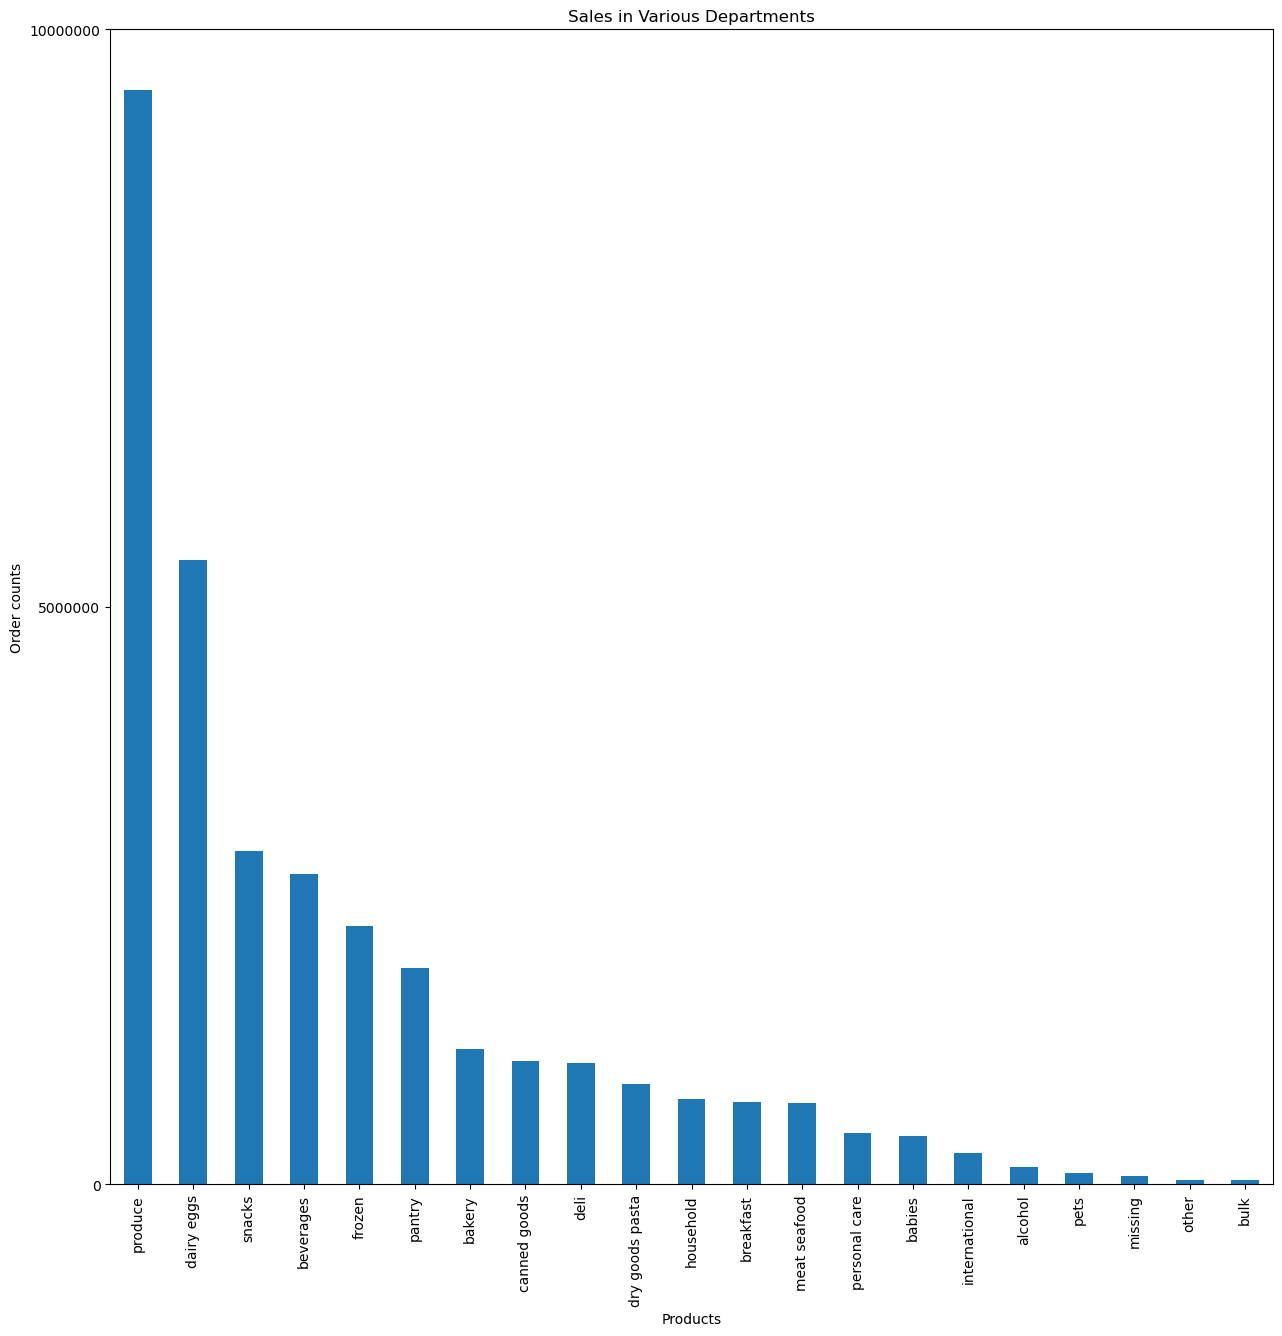

In [160]:
#Bar chart to show sales per department
plt.figure(figsize=(15, 15))

# Calculate the counts and sort by value (descending)
department_counts = customer_ords_prods['department_name'].value_counts().sort_values(ascending=False)

# Plot the bar chart with the sorted counts
department_counts.plot.bar()

# Add title and labels
plt.title('Sales in Various Departments')
plt.xlabel('Products')
plt.ylabel('Order counts')

# Add legend
plt.yticks(np.arange(0,15000000,5000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,5000000)])

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6 4.10 bar_sales_vs_departments.png'))
plt.show()

In [ ]:
In this bar chart, we can see that the produce section is the most popular deparment for total sales. 

# Part 11: Customer Profiles Between Parent Status and Income Brackets
## Exercise Question 5: 
### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


In [175]:
# Define the desired order of income brackets
income_order = ['Low Income Customer', 'Middle Income Customer', 'High Income Customer']

# Convert 'Income_bracket' to a categorical type with the specified order
customer_ords_prods['Income_bracket'] = pd.Categorical(customer_ords_prods['Income_bracket'], categories=income_order, ordered=True)

crosstab_income_vs_dependents = pd.crosstab(customer_ords_prods['parent_status'], customer_ords_prods['Income_bracket'], dropna = False)
crosstab_income_vs_dependents

Income_bracket,Low Income Customer,Middle Income Customer,High Income Customer
parent_status,,,
Parent,12182967,6069697,6072452
Single,4031174,2037518,2035277


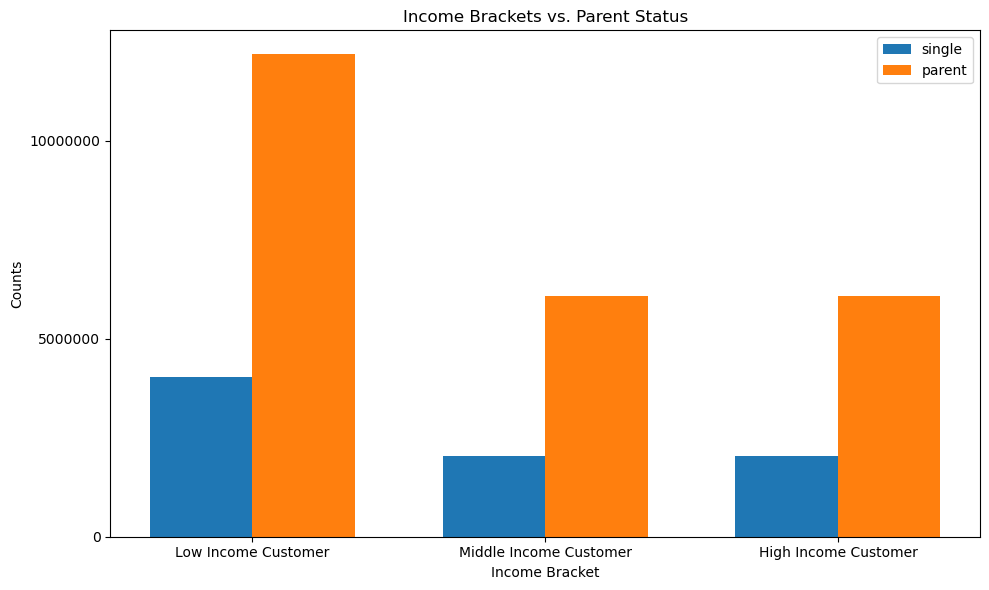

In [188]:
plt.figure(figsize=(10, 6))
bar_width = 0.35

# Plot bars for 'single'
plt.bar(r1, crosstab_income_vs_dependents.loc['Single'], width=bar_width, label='single')

# Plot bars for 'parent'
plt.bar(r2, crosstab_income_vs_dependents.loc['Parent'], width=bar_width, label='parent')

# Add labels and title
plt.xlabel('Income Bracket')
plt.ylabel('Counts')
plt.title('Income Brackets vs. Parent Status')
plt.xticks([r + bar_width / 2 for r in range(len(crosstab_income_vs_dependents.columns))], crosstab_income_vs_dependents.columns)

# Add legend
plt.yticks(np.arange(0,15000000,5000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,5000000)])
plt.legend()

plt.tight_layout() 
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '7 4.10 bar_incomes_vs_dependents.png'))
plt.show()

In this graph, patient profiles of Single, or Parent status were created between the various income brackets. This data suggests that a majority of orders were generated within the low income bracket, specifically who are parents. This categorical data is defined as parents who make less than $96,608 a year. 

While this income level is not necessarily "low-income" when compared to conventional standards, these customers are within the lower quartile of income data when using the describe() function.

# Part 12: Income Bracket Descriptive Statistics
# Exercise Question 7
## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [261]:
#using a group by statement in order to aggregate data for the customer population (Parent, low-income

groupby_profile= customer_ords_prods.groupby('Income_bracket').agg({'prices': ['max', 'min', 'mean']})
groupby_profile

/var/folders/c3/gxzbvq9x1032lnrpvbyhdtrw0000gn/T/ipykernel_28337/1505004848.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_profile= customer_ords_prods.groupby('Income_bracket').agg({'prices': ['max', 'min', 'mean']})


prices               
                          max  min      mean
Income_bracket                              
Low Income Customer      25.0  1.0  7.625749
Middle Income Customer   25.0  1.0  7.969716
High Income Customer     25.0  1.0  7.961588

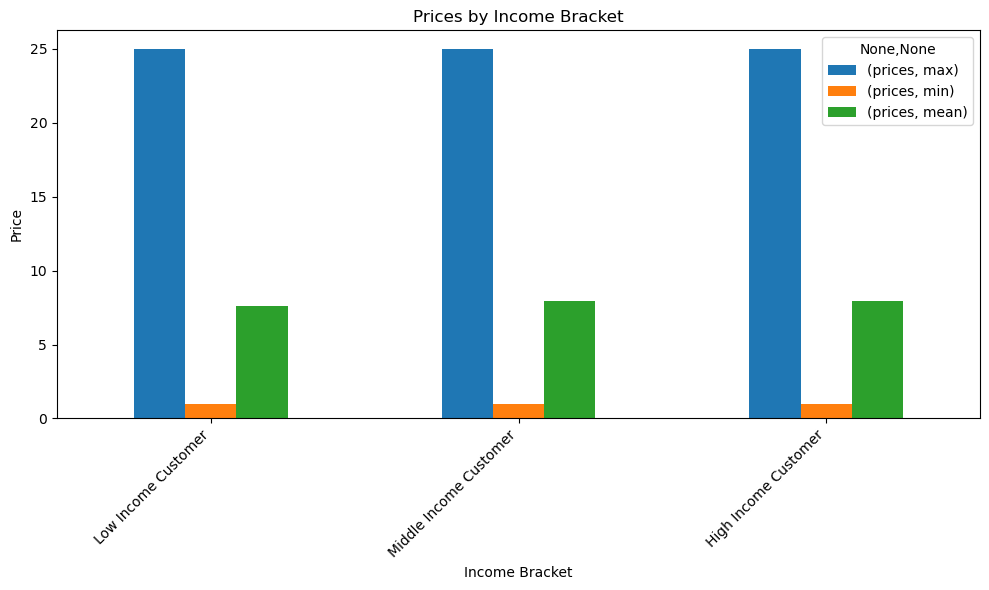

In [274]:
# Plot the bar graph
groupby_profile.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Prices by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '8 4.10 bar_income_vs_spending_habits.png'))
plt.show()

Through this data, it seems like all customer income levels like to purchase similarly priced items. At every income level, they all seem to average spending around $7.5-$8 an item. Though these different customer levels seem to have similar purchase habits, we know from previous graphs that there is a dramatic increase in the volume of lower-income customers that use the platform, specifically lower income parents.

# Exercise Question 8:
## Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [235]:
#A new subset of data filtered based on instacart's most popular demographic (Lower income parents)

low_income_parents = customer_ords_prods[(customer_ords_prods['parent_status'] == 'Parent') & (customer_ords_prods['Income_bracket'] == 'Low Income Customer')]
low_income_parents.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_dependants,fam_status,income,Region,activity_customer_level,age_group,Income_bracket,parent_status,day_of_week,department_name
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,3,married,40423,South,High-activity Customer,Young adult,Low Income Customer,Parent,Monday,beverages
1,2539329,1,1,2,8,11.114836,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,3,married,40423,South,High-activity Customer,Young adult,Low Income Customer,Parent,Monday,dairy eggs
2,2539329,1,1,2,8,11.114836,12427,3,0,Original Beef Jerky,...,3,married,40423,South,High-activity Customer,Young adult,Low Income Customer,Parent,Monday,snacks
3,2539329,1,1,2,8,11.114836,26088,4,0,Aged White Cheddar Popcorn,...,3,married,40423,South,High-activity Customer,Young adult,Low Income Customer,Parent,Monday,snacks
4,2539329,1,1,2,8,11.114836,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,3,married,40423,South,High-activity Customer,Young adult,Low Income Customer,Parent,Monday,household


In [270]:
#Product data used to identify which were the top 10 products that were purchased within this demographic
product_counts = low_income_parents['product_name'].value_counts(dropna=False)

top_10_products_low_income_parents=product_counts.head(10)
top_10_products_low_income_parents

#Through these value counts we can see that it is heaviy within the produce department, which is consistent with earlier graphs identified

product_name
Banana                    170591
Bag of Organic Bananas    143559
Organic Strawberries       97857
Organic Baby Spinach       88445
Organic Hass Avocado       78648
Organic Avocado            64548
Strawberries               58342
Large Lemon                53046
Organic Raspberries        51163
Limes                      49319
Name: count, dtype: int64

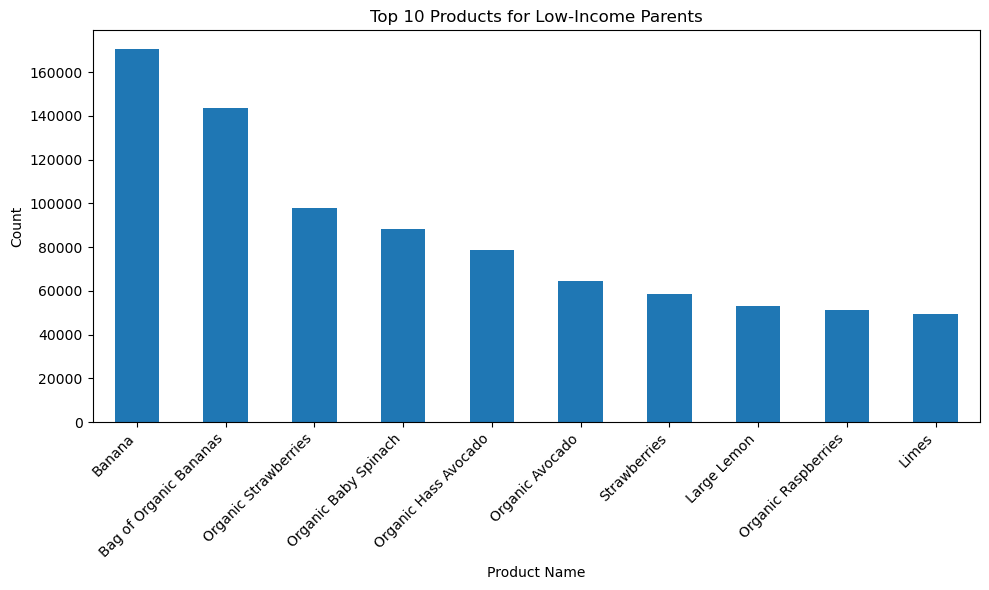

In [273]:
# Create a bar graph
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')

# Add labels and title
plt.title('Top 10 Products for Low-Income Parents')
plt.xlabel('Product Name')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9 4.10 bar_top_10_products_low_income_parents.png'))
plt.show()

In this graph, we can see which products this populations orders the most. We can notice these are all within the produce department. Orders for these types of goods can be further emphasized with our marketing team

# Part 13: Export Data

In [326]:
#Exporting final merged dataframe
customer_ords_prods.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10 customer_ords_prods.pkl'))